# Midterm 1: API Call to Community for most recommended user comments with count and geography 

In [2]:
import requests
import logging
from bs4 import BeautifulSoup
import json
import glob
import os
import re
import datetime
import string
from nltk.corpus import stopwords
from collections import Counter
logger = logging.getLogger(__name__)

In [3]:
r = requests.get("https://developer.nytimes.com/community_api_v3.json?&api-key=ad7cc4f2ca2d4c518eb2d88b3e768657")
type(r) #Requests.modal.response is a request object obtained
data = r.json() #To extract in form of JSON data
with open('article_value_response.txt', 'w') as outfile:
    json.dump(data, outfile)

requests.models.Response

In [141]:
files=glob.glob('apicall/community/userComments/*')
textbody=[]
reco = []

for file in files:
    #print(file) # the list of files for referring
    with open(file) as data_file:    
        data = json.load(data_file)
        x = data['results']['comments']

In [137]:
recommendationcount = []
commentbody = []
userlocation = []
for y in x:
    recommendationcount.append((y['recommendationCount']))
    commentbody.append((y['commentBody']))
    userlocation.append((y['userLocation']))
finalsummary= (list(zip(recommendationcount,commentbody,userlocation)))
finallist = sorted(finalsummary, reverse = True) # Reverse sorting to know which are top notch recommended comments
toptencomments = finallist[:10]

In [98]:
toptencomments

[(308,
  'Step one was delegitimizing traditional media by calling it mainstream media and claiming that it was all politically biased against the right.<br/><br/>Step two was claiming that traditional media is nothing but a pack of lies.<br/><br/>Step three is proclaiming that we are now officially in post truth America where convincing the listener is all that matters.<br/><br/>Step four was using all three above to get an incompetent demagogue elected to the Presidency.<br/><br/>Step four was for the demagogue to appoint an extremist fanatic as his chief law enforcement officer (AG) solely because of his unyielding support.  <br/><br/>Step five is for the new AG to circumvent the laws he is will soon be sworn to uphold in order to secure his appointment.<br/><br/>Step five is for the new AG to do whatever the demagogue wants in order to further his political agenda which is primarily concerned with installing a permanent oligarchy to rule America.<br/><br/>Step six is selling out Am

In [ ]:
# To formulate a CSV file containing all the data and create Word Cloud 

In [105]:
import csv
with open('toptencomments.csv','w') as fp: #Command to make csv
    a = csv.writer(fp, delimiter = ',',lineterminator='\n')
    a.writerow(("Recommended Count","Recommended Text","Location"))
    a.writerows(toptencomments,) #writerows and writerow would give a single row

In [108]:
emailtext = ''.join(commentbody)

In [128]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from PIL import ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update('the','I','that','would','br','com','http','Sessions')
print(sorted(stop_words))

['I', 'S', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'b', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'e', 'each', 'few', 'for', 'from', 'further', 'h', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'l', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'n', 'needn', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'p', 'r', 're', 's', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 

In [134]:
new_stop=set(stop)
new_stop.add('br')
new_stop.add('https')
new_stop.add('blank')
new_stop.add('state')
new_stop.add('http')
new_stop.add('www')
new_stop.add('Sessions')
new_stop.add('employees')
new_stop.add('energy')
new_stop.add('New')

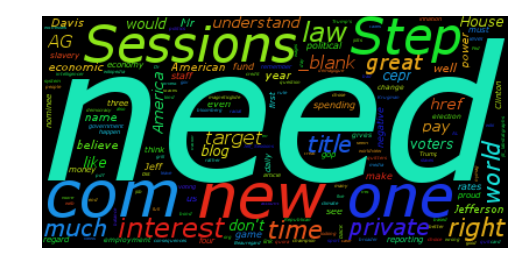

In [135]:
font = ImageFont.truetype("arial.ttf", 15)

wordcloud = WordCloud(font_path='C:\\Users\\Jay Padhya\\Documents\\A_Midterm\\verdanai.ttf',
                      relative_scaling = 0.5,
                      stopwords = new_stop 
                      ).generate(emailtext)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Inference : Most users use hyperlinks to justify their points and hence NY Times should target advertisers like bitly which can condense the URL shared and users can make concise comments. Also, words like Need,Trump, Economic, negative, overspending suggests that people are inclined on talking about politics and economics
